<a href="https://colab.research.google.com/github/semorrall/colab_uploads/blob/main/sandbox_stephanie/Individual_HW8_Stephanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [14]:
frog1 = np.array([1205, 2527, 1745, 1556,  493, 2276,  556, 1928, 2641, 1897, 1891,
       1545, 1307, 1692, 1543, 1282,  775, 2032, 1240,  473])
frog2 = np.array([1612,  605,  327,  946,  541, 1539,  529,  628, 1453,  297,  703,
        269,  751,  245, 1182,  515,  435,  383,  457,  730])
frog3 = np.array([614, 414, 324, 776, 611, 544, 538, 579, 806, 459, 458, 626, 621,
       544, 535, 385, 401, 614, 665, 488])
frog4 = np.array([172, 142,  37, 453, 355,  22, 502, 273, 720, 582, 198, 198, 597,
       516, 815, 402, 605, 711, 614, 468])

In [15]:
frog_diff = frog2.mean() - frog3.mean()
frog_diff

157.25

In [16]:
def ecdf(data):
  """Generate x and y values for plotting an ECDF."""
  x_vals = np.sort(data)
  y_vals = np.arange(1, len(data)+1) / len(data)
  
  return x_vals, y_vals

## Hypothesis test 1: Do frog 2 and frog 3 results come from the same distribution?

Steps:

- Combine results from frog 2 and frog 3
- Use `np.random.permutation` to mix up the results
- Have first 20 results be 'frog 2' and the last 20 results be 'frog 3' in your bootstrap samples
- Compute some test statistic of interest (like difference of mean between frog 2 and frog 3)
- Compare your 1,000 or 10,000 bootstrap replicates to the true difference seen in the data 


In [17]:
combined = np.concatenate((frog2,frog3))
combined

array([1612,  605,  327,  946,  541, 1539,  529,  628, 1453,  297,  703,
        269,  751,  245, 1182,  515,  435,  383,  457,  730,  614,  414,
        324,  776,  611,  544,  538,  579,  806,  459,  458,  626,  621,
        544,  535,  385,  401,  614,  665,  488])

In [18]:
np.random.permutation(combined)

array([ 703,  751,  611,  806,  385,  614,  621,  614,  297,  544,  529,
        535, 1453,  776,  579,  628,  324,  515,  538,  946,  458,  605,
        544,  541, 1612,  327,  457,  665,  730, 1182,  401,  383,  414,
        245,  459,  488,  269,  626, 1539,  435])

In [19]:
num_reps = 10000

bs_rep = np.zeros(num_reps)
xtreme_counter = 0

for i in range(num_reps):

  perm = np.random.permutation(combined)
  frogA_samp = perm[:20]
  frogB_samp = perm[20:]
  diff = frogA_samp.mean() - frogB_samp.mean()

  if np.abs(diff) >= frog_diff :
    xtreme_counter += 1

  bs_rep[i] = diff

  p_value = xtreme_counter / num_reps


In [21]:
p_value

0.1272

In [ ]:
bs_rep

array([ -74.65,  204.55,  115.35, ...,   14.75, -108.05,  160.35])

In [ ]:
frog_diff

157.25

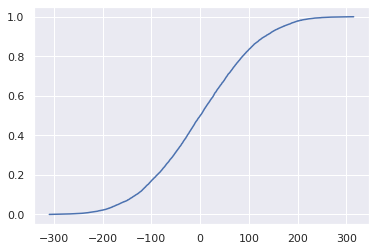

In [ ]:
x,y = ecdf(bs_rep)

plt.plot(x,y)

## Hypothesis test 2: Do frog 1 and frog 4 have the same mean?

Steps:
- Compute the mean of frog 1 and frog 4 together
- Get shifted values for the frogs, where frog 1 will be shifted down and frog 4 will be shifted up. These shifted values should now have the same mean.
- Conduct your bootstrap replicates on these shifted data. For each replicate, get a mean for frog 1 and frog 4 in these shifted data and record their difference

In [ ]:
# this might help! how to sample *with* replacement
np.random.choice(frog1, size=20, replace=True)

array([1543, 1205,  775, 1556, 2276, 1556, 1897,  493,  775, 1282, 1745,
       1307, 2527, 1692, 2641,  493, 1240, 1745, 1543, 1891])

In [ ]:
frog1_mean = frog1.mean()
frog1_mean

1530.2

In [ ]:
frog4_mean = frog4.mean()
frog4_mean

419.1

In [ ]:
total_mean = (frog2.mean() + frog3.mean())/2
total_mean

628.725

In [ ]:
frog1_shifted = frog1 - frog1_mean + total_mean
frog1_shifted

array([ 303.525, 1625.525,  843.525,  654.525, -408.475, 1374.525,
       -345.475, 1026.525, 1739.525,  995.525,  989.525,  643.525,
        405.525,  790.525,  641.525,  380.525, -126.475, 1130.525,
        338.525, -428.475])

In [ ]:
frog4_shifted = frog4 - frog4_mean + total_mean
frog4_shifted

array([ 381.625,  351.625,  246.625,  662.625,  564.625,  231.625,
        711.625,  482.625,  929.625,  791.625,  407.625,  407.625,
        806.625,  725.625, 1024.625,  611.625,  814.625,  920.625,
        823.625,  677.625])

In [ ]:
frog4

array([172, 142,  37, 453, 355,  22, 502, 273, 720, 582, 198, 198, 597,
       516, 815, 402, 605, 711, 614, 468])

In [ ]:
frog_diff = frog1.mean() - frog4.mean()
frog_diff

1111.1

In [ ]:
np.random.choice(frog1, size=20, replace=True)

array([ 556, 1928, 1205,  556,  556, 1692, 2276, 1282, 1307, 2032, 1891,
       1891, 1692,  493, 1282, 1891, 1543, 1897, 1307, 1692])

In [ ]:
num_reps = 10000

bs_rep = np.zeros(num_reps)
xtreme_counter = 0

for i in range(num_reps):

  frogA_samp = np.random.choice(frog1_shifted, size=20, replace=True)
  frogB_samp = np.random.choice(frog4_shifted, size=20, replace=True)
  diff = frogA_samp.mean() - frogB_samp.mean()

  if np.abs(diff) >= frog_diff :
    xtreme_counter += 1

  bs_rep[i] = diff

p_value = xtreme_counter / num_reps

In [ ]:
p_value

0.0

#Individual HW 8

In [32]:
def permutation_p_value_distribution(data1, data2, num_reps= 10000):

  mean_diff = data1.mean() - data2.mean()
  combined = np.concatenate((data1,data2))

  bs_rep = np.zeros(num_reps)
  xtreme_counter = 0

  for i in range(num_reps):

    perm = np.random.permutation(combined)
    A_samp = perm[:len(data1)]
    B_samp = perm[len(data2):]
    diff = A_samp.mean() - B_samp.mean()

    if np.abs(diff) >= mean_diff :
      xtreme_counter += 1

    bs_rep[i] = diff

  p_value = xtreme_counter / num_reps

  return p_value

In [23]:
permutation_p_value_distribution(frog2 ,frog3)

0.1243

This is a two tailed test on the difference of means of two data sets. My null hypothesis is that there is no difference in the means of the two data sets. 



In [33]:
permutation_p_value_distribution(frog1 ,frog2)

0.0001

In [34]:
permutation_p_value_distribution(frog1 ,frog3)

0.0

In [35]:
permutation_p_value_distribution(frog1 ,frog3)

0.0

In [36]:
permutation_p_value_distribution(frog1 ,frog4)

0.0

In [37]:
permutation_p_value_distribution(frog2 ,frog3)

0.1214

In [38]:
permutation_p_value_distribution(frog2 ,frog4)

0.0101

In [39]:
permutation_p_value_distribution(frog3 ,frog4)

0.0348

I only failed to reget the null hypothesis (if alpha is 0.05 and 10,000 permutations are preformed) for frog2 vs frog3. For all other pair wise sets, I regected the null hypothesis. 